In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Randomized Group-by Experiment (k=10)

In [2]:
df = pd.read_csv("../experiment/baseline(k=10).csv")
df["total_time"]=df["total_time"]/1e9 #ns --> s conversion
avrg = df.groupby("algo",as_index=False).mean()
stdev = df.groupby("algo",as_index=False).apply(std)
avrg["std_time"]=stdev["total_time"]
avrg["std_utility"]=stdev["total_utility"]

In [3]:
avrg

,algo,total_time,total_utility,std_time,std_utility
0,frontierGreedy,0.002380,270.271124,0.009069,201.553268
1,greedy,0.000613,263.270279,0.000389,197.316754
2,multipleRandomWalk1,0.000176,68.520088,0.000205,76.427825
3,multipleRandomWalk10,0.000573,86.107662,0.001346,93.826072
4,multipleRandomWalk1000,0.019714,160.999274,0.030428,118.706732
5,multipleRandomWalk10000,0.159199,211.599036,0.123836,147.184964
6,multipleRandomWalk100000,1.155280,230.142741,0.183352,155.402773
7,multipleRandomWalk1000000,10.983988,250.841640,1.624442,172.620348
8,naiveGreedy,0.000180,80.088410,0.000083,54.354273


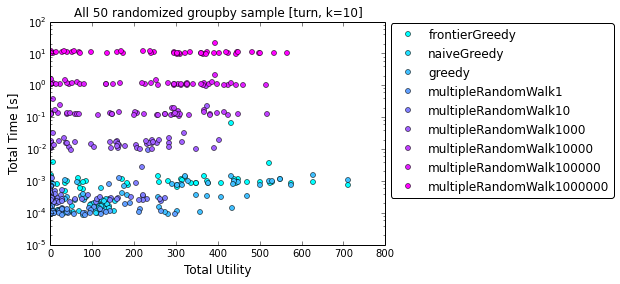

In [4]:
fig,ax = plt.subplots()
plt.title("All 50 randomized groupby sample [turn, k=10]")
color=iter(cm.cool(np.linspace(0,1,len(df.algo.unique()))))
for algo in df.algo.unique():
    algo_df = df[df["algo"]==algo]
    plt.semilogy(algo_df["total_utility"],algo_df["total_time"],'o',ms=5,c=next(color),label=algo)
plt.legend(numpoints=1, bbox_to_anchor=(1.7, 1.02),fancybox=True)
plt.xlabel("Total Utility",fontsize=12)
plt.ylabel("Total Time [s]",fontsize=12)
fig.savefig("50_randomized_groupby_experiment_k10_all.pdf")

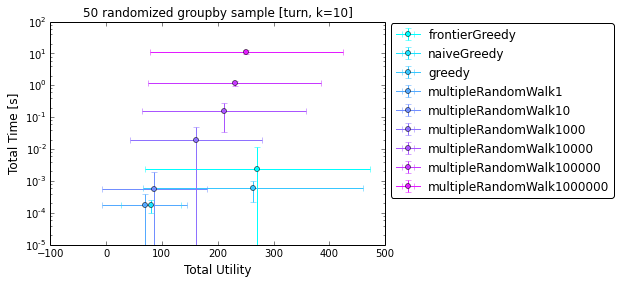

In [5]:
fig,ax = plt.subplots()
plt.title("50 randomized groupby sample [turn, k=10]")
color=iter(cm.cool(np.linspace(0,1,10)))
for algo in df.algo.unique():
    algo_df = avrg[avrg["algo"]==algo]
    plt.errorbar(algo_df["total_utility"],algo_df["total_time"],xerr=algo_df["std_utility"],yerr=algo_df["std_time"],c=next(color),fmt="-o",ms=5,label=algo)
ax.set_yscale("log", nonposy='clip')
plt.legend(numpoints=1, bbox_to_anchor=(1.7, 1.02),fancybox=True)
plt.xlabel("Total Utility",fontsize=12)
plt.ylabel("Total Time [s]",fontsize=12)
fig.savefig("50_randomized_groupby_experiment_k10_aggregated.pdf")

In [6]:
rand = df.sample()
rand

,xAxis,yAxis,algo,groupby,total_time,total_utility
249,is_profile_query,reduce_output_records,multipleRandomWalk10000,"[is_profile_query,has_corr_list_fn,has_impress...",0.148806,164.950799


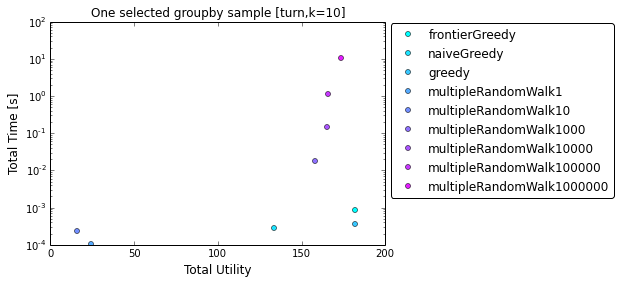

In [7]:
xAxis = rand["xAxis"].values[0]
yAxis = rand["yAxis"].values[0]
groupby = rand["groupby"].values[0]
selected_df = df[(df["xAxis"]==xAxis)&(df["yAxis"]==yAxis)&(df["groupby"]==groupby)]
fig,ax = plt.subplots()
plt.title("One selected groupby sample [turn,k=10]")
color=iter(cm.cool(np.linspace(0,1,10)))
for algo in df.algo.unique():
    algo_df = selected_df[selected_df["algo"]==algo]
    plt.semilogy(algo_df["total_utility"],algo_df["total_time"],"o",ms=5,label=algo,c=next(color))
plt.legend(numpoints=1, bbox_to_anchor=(1.7, 1.02),fancybox=True)
plt.xlabel("Total Utility",fontsize=12)
plt.ylabel("Total Time [s]",fontsize=12)
fig.savefig("50_randomized_groupby_experiment_k10_selected.pdf")

# Randomized Group-by Experiment (k=30)

Demonstrating the tradeoff as dataset or k gets larger Random Walk does better.

In [8]:
df = pd.read_csv("../experiment/baseline(k=30).csv")
df["total_time"]=df["total_time"]/1e9 #ns --> s conversion
avrg = df.groupby("algo",as_index=False).mean()
stdev = df.groupby("algo",as_index=False).apply(std)
avrg["std_time"]=stdev["total_time"]
avrg["std_utility"]=stdev["total_utility"]

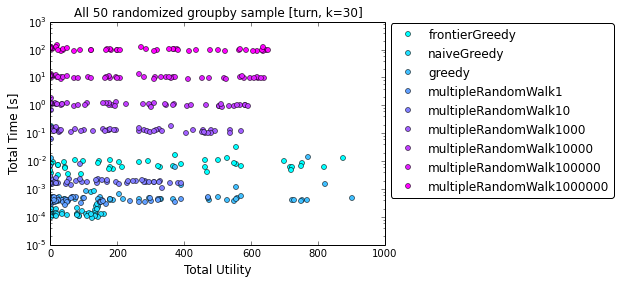

In [9]:
fig,ax = plt.subplots()
plt.title("All 50 randomized groupby sample [turn, k=30]")
color=iter(cm.cool(np.linspace(0,1,len(df.algo.unique()))))
for algo in df.algo.unique():
    algo_df = df[df["algo"]==algo]
    plt.semilogy(algo_df["total_utility"],algo_df["total_time"],'o',ms=5,c=next(color),label=algo)
plt.legend(numpoints=1, bbox_to_anchor=(1.7, 1.02),fancybox=True)
plt.xlabel("Total Utility",fontsize=12)
plt.ylabel("Total Time [s]",fontsize=12)
fig.savefig("50_randomized_groupby_experiment_k30_all.pdf")

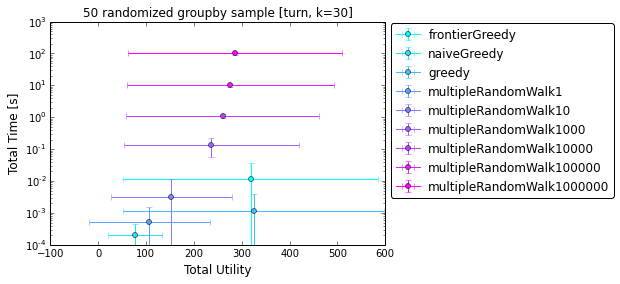

In [10]:
fig,ax = plt.subplots()
plt.title("50 randomized groupby sample [turn, k=30]")
color=iter(cm.cool(np.linspace(0,1,len(df.algo.unique()))))
for algo in df.algo.unique():
    algo_df = avrg[avrg["algo"]==algo]
    plt.errorbar(algo_df["total_utility"],algo_df["total_time"],xerr=algo_df["std_utility"],yerr=algo_df["std_time"],c=next(color), fmt="-o",ms=5,label=algo)
ax.set_yscale("log", nonposy='clip')
plt.legend(numpoints=1, bbox_to_anchor=(1.7, 1.02),fancybox=True)
plt.xlabel("Total Utility",fontsize=12)
plt.ylabel("Total Time [s]",fontsize=12)
fig.savefig("50_randomized_groupby_experiment_k30_aggregated.pdf")

In [11]:
rand = df.sample()
rand

,xAxis,yAxis,algo,groupby,total_time,total_utility
217,is_multi_query,map_input_records,naiveGreedy,"[has_having_clause,has_order_by_clause,has_lis...",0.00014,113.92791


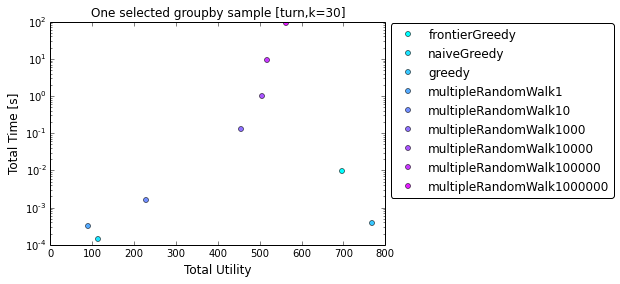

In [12]:
xAxis = rand["xAxis"].values[0]
yAxis = rand["yAxis"].values[0]
groupby = rand["groupby"].values[0]
selected_df = df[(df["xAxis"]==xAxis)&(df["yAxis"]==yAxis)&(df["groupby"]==groupby)]
fig,ax = plt.subplots()
plt.title("One selected groupby sample [turn,k=30]")
color=iter(cm.cool(np.linspace(0,1,10)))
for algo in df.algo.unique():
    algo_df = selected_df[selected_df["algo"]==algo]
    plt.semilogy(algo_df["total_utility"],algo_df["total_time"],"o",ms=5,label=algo,c=next(color))
plt.legend(numpoints=1, bbox_to_anchor=(1.7, 1.02),fancybox=True)
plt.xlabel("Total Utility",fontsize=12)
plt.ylabel("Total Time [s]",fontsize=12)
fig.savefig("50_randomized_groupby_experiment_k30_selected.pdf")

# Multiple Random Performance

In [13]:
df = pd.read_csv("../experiment/random_walk_scalability_experiment.csv")
df["total_time"]=df["total_time"]/1e9 #ns --> s conversion

In [14]:
avrg = df.groupby("iterations",as_index=False).mean()
stdev = df.groupby("iterations",as_index=False).std()

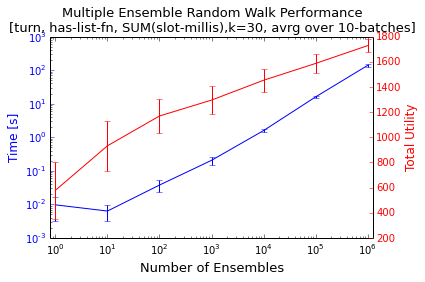

In [15]:
fig, ax1 = plt.subplots()
plt.title("Multiple Ensemble Random Walk Performance \n[turn, has-list-fn, SUM(slot-millis),k=30, avrg over 10-batches]",fontsize=13)

ax1.errorbar(avrg["iterations"], avrg["total_time"],yerr=stdev["total_time"],color='b')
ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')

ax1.set_xlabel('Number of Ensembles',fontsize=13)

ax1.set_ylabel('Time [s]', color='b',fontsize=12)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.errorbar(avrg["iterations"], avrg["total_utility"],yerr=stdev["total_utility"],color='r')
ax2.set_xscale("log", nonposy='clip')
ax2.set_ylabel('Total Utility', color='r',fontsize=12)
ax2.tick_params('y', colors='r')
plt.xlim(0.8,10**6.1)
fig.tight_layout()
plt.show()
fig.savefig("multiple_random_walk_performance.pdf")

In [16]:
frontier_greedy = [187711327/1e9,2700.52255654335]
naive_greedy = [883536/1e9,206.59106254577637]

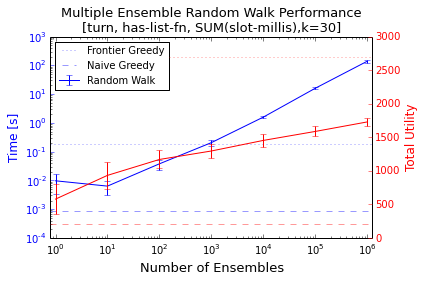

In [17]:
fig, ax1 = plt.subplots()
plt.title("Multiple Ensemble Random Walk Performance \n[turn, has-list-fn, SUM(slot-millis),k=30]",fontsize=13)
xmin = 0.8
xmax = 10**6.1
ax1.errorbar(avrg["iterations"], avrg["total_time"],yerr=stdev["total_time"],color='b',label="Random Walk")
ax1.hlines(frontier_greedy[0],xmin,xmax,color="b",linestyles=':',alpha=0.4,label="Frontier Greedy")
ax1.hlines(naive_greedy[0],xmin,xmax,color="b",linestyles='--',alpha=0.4,label="Naive Greedy")

ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposy='clip')

ax1.set_xlabel('Number of Ensembles',fontsize=13)

ax1.set_ylabel('Time [s]', color='b',fontsize=12)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.errorbar(avrg["iterations"], avrg["total_utility"],yerr=stdev["total_utility"],color='r')
ax2.hlines(frontier_greedy[1],150,xmax,color="r",linestyles=':',alpha=0.4)
ax2.hlines(naive_greedy[1],xmin,xmax,color="r",linestyles='--',alpha=0.4)
ax2.set_xscale("log", nonposy='clip')
ax2.set_ylabel('Total Utility', color='r',fontsize=12)
ax2.tick_params('y', colors='r')
plt.xlim(xmin,xmax)
fig.tight_layout()
legend = ax1.legend(numpoints=1,fontsize=10,loc="upper left")
legend.set_zorder(1) # make it on top
plt.show()
fig.savefig("multiple_random_walk_performance_compared_with_other_algo.pdf")